# Bayesian Changepoint Detection with multivariate data in Python

This code computes the probability of changepoints (including changes in correlation) in a time series. In this notebook I show how you can use it. This example is modified from Xiang Xuan's thesis Section 3.2.

First let's generate some data and load some modules:

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import bayesian_changepoint_detection.generate_data as gd
import seaborn

%matplotlib inline
%load_ext autoreload
%autoreload 2

partition, data = gd.generate_xuan_motivating_example(200,500)

Let's plot this data:

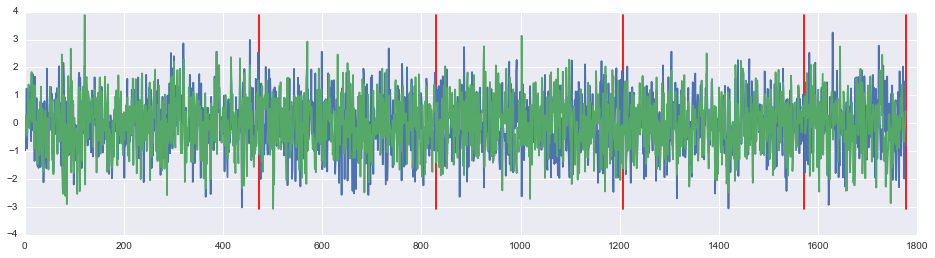

In [2]:
import numpy as np
changes = np.cumsum(partition)

fig, ax = plt.subplots(figsize=[16, 4])
for p in changes:
  ax.plot([p,p],[np.min(data),np.max(data)],'r')
for d in range(2):
  ax.plot(data[:,d])

Let's try to detect the changes with independent features:

Use SSE accelerated logsumexp().


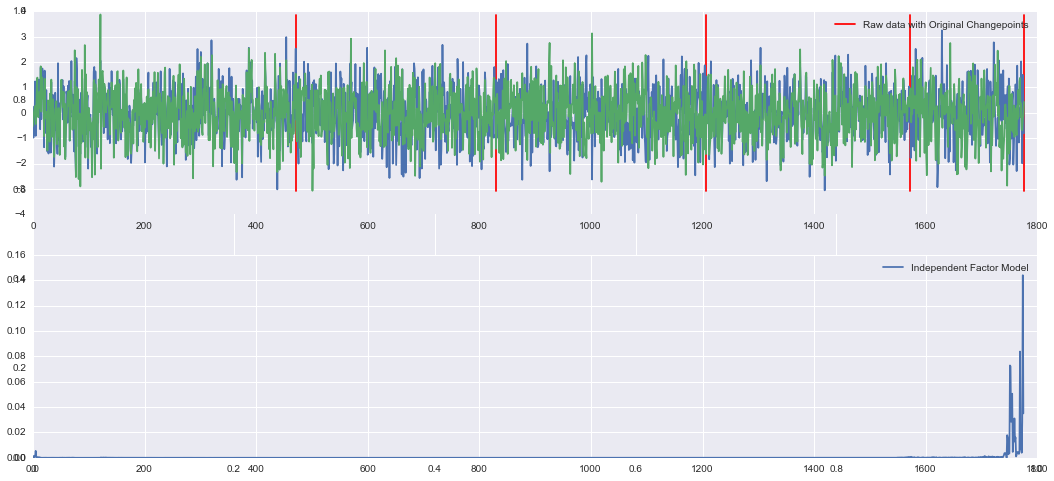

In [3]:
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from functools import partial

Q_ifm, P_ifm, Pcp_ifm = offcd.offline_changepoint_detection(data,partial(offcd.const_prior, l=(len(data)+1)),offcd.ifm_obs_log_likelihood,truncate=-20)

fig, ax = plt.subplots(figsize=[18, 8])
ax = fig.add_subplot(2, 1, 1)
for p in changes:
  ax.plot([p,p],[np.min(data),np.max(data)],'r')
for d in range(2):
  ax.plot(data[:,d])
plt.legend(['Raw data with Original Changepoints'])
ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(np.exp(Pcp_ifm).sum(0))
plt.legend(['Independent Factor Model'])
plt.show()

Unfortunately, not very good... Now let's try the full covariance model (warning, it'll take a while):

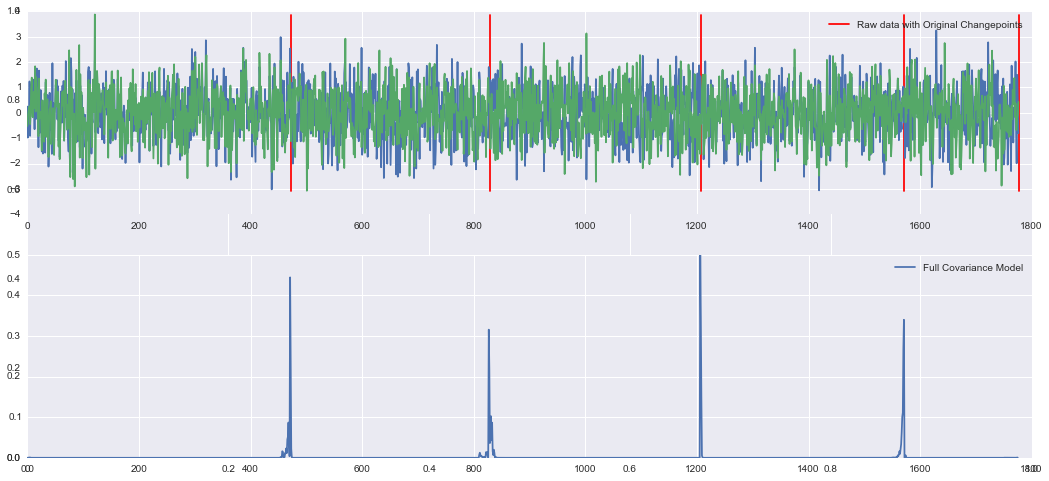

In [4]:
Q_full, P_full, Pcp_full = offcd.offline_changepoint_detection(data,partial(offcd.const_prior, l=(len(data)+1)),offcd.fullcov_obs_log_likelihood, truncate=-20)

fig, ax = plt.subplots(figsize=[18, 8])
ax = fig.add_subplot(2, 1, 1)
for p in changes:
  ax.plot([p,p],[np.min(data),np.max(data)],'r')
for d in range(2):
  ax.plot(data[:,d])
plt.legend(['Raw data with Original Changepoints'])
ax = fig.add_subplot(2, 1, 2, sharex=ax)
ax.plot(np.exp(Pcp_full).sum(0))
plt.legend(['Full Covariance Model'])
plt.show()

Ahh, much better now!

In [ ]:
%timeit Q_ifm, P_ifm, Pcp_ifm = offcd.offline_changepoint_detection(data,partial(offcd.const_prior, l=(len(data)+1)),offcd.ifm_obs_log_likelihood,truncate=-20)